Link : [Kaggle Page](https://www.kaggle.com/datasets/mariyamalshatta/nike-vs-addidas-unspervised-clustering/data)

## Data Description 
The dataset consists of 3268 products from Nike and Adidas with features of information including their ratings, discount, sales price, listed price, product name, and the number of reviews.

## Primary Objective
Machine learning clustering techniques approach for extracting actionable insights from the Nike and Adidas footwear dataset, enabling data-driven decision making and strategic business recommendations.

## Detailed Objectives

1. **Data Analysis & Pattern Discovery**
   
2. **Advanced Machine Learning Clustering Implementation**
 
3. **Business Intelligence Generation**


## Expected Outcomes
The project aims to deliver a comprehensive understanding of product dynamics between Nike and Adidas Sneakers, enabling informed decision-making for product development and marketing strategies.

1. **Product grouping that can implement as a recommendation or segmentation**

# Import Library and Load Dataset from Kaggle

In [28]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib
matplotlib.use('Agg')  # Use non-interactive backend
%matplotlib inline

import matplotlib.pyplot as plt
plt.ion()  # Turn on interactive mode

# Your other imports
import pandas as pd
from ydata_profiling import ProfileReport

pd.set_option("display.max_rows", 100)
df = pd.read_csv('data_nike_vs_addidas_unsupervised.csv')
df.head(100)

Product Name Product ID  \
0   Women's adidas Originals NMD_Racer Primeknit S...     AH2430   
1                Women's adidas Originals Sleek Shoes     G27341   
2                   Women's adidas Swim Puka Slippers     CM0081   
3    Women's adidas Sport Inspired Questar Ride Shoes     B44832   
4            Women's adidas Originals Taekwondo Shoes     D98205   
5   Women's adidas Sport Inspired Duramo Lite 2.0 ...     B75586   
6   Women's adidas Sport Inspired Duramo Lite 2.0 ...     CG4051   
7                   Women's adidas Swim Puka Slippers     CM0080   
8               WOMEN'S ADIDAS RUNNING DURAMO 9 SHOES     B75990   
9           Men's adidas Originals Forest Grove Shoes     EE5761   
10           Women's adidas Originals Swift Run Shoes     EE4553   
11    Women's adidas Originals Continental Vulc Shoes     EF9315   
12              Women's adidas Running Duramo 9 Shoes     F35281   
13          Women's adidas Originals Supercourt Shoes     EF9220   
14   Men's adidas Sport Inspired Response Trail Shoes     EG0000   
15              Women's adidas Running Cosmic 2 Shoes     B44889   
16   Women's adidas Sport Inspired Storm Runner Shoes     CL7417   
17     Women's adidas Sport Inspired Quickspike Shoes     CL7408   
18           WOMEN'S ADIDAS SWIM CLOUDFOAM FLIP FLOPS     B43601   
19     Women's adidas Sport Inspired Lite Racer Shoes     EE8245   
20              Women's adidas Running Duramo 9 Shoes     EE8042   
21       Women's adidas Sport Inspired Arcadeis Shoes     CL7429   
22         Women's adidas Sport Inspired Videll Shoes     CL7370   
23        Women's adidas Running EnergyFalcon X Shoes     EE9946   
24         Women's adidas Sport Inspired Videll Shoes     CK9741   
25             Women's adidas Running Hellion Z Shoes     CL7363   
26         Women's adidas Sport Inspired Videll Shoes     CL7372   
27       Women's adidas Sport Inspired Arcadeis Shoes     CL7430   
28  Women's adidas Sport Inspired Cloudfoam Pure S...     F34485   
29             Women's adidas Running Hellion Z Shoes     CL7365   
30      Women's adidas Sport Inspired Yking 2.0 Shoes     CL7373   
31             Women's adidas Running Hellion Z Shoes     CL7364   
32      Women's adidas Sport Inspired Yking 2.0 Shoes     CL7374   
33      Women's adidas Sport Inspired RunFalcon Shoes     EE8167   
34     Women's adidas Sport Inspired Quickspike Shoes     CL7410   
35   Women's adidas Sport Inspired Blaze Runner Shoes     CL7401   
36  Women's adidas Sport Inspired Lite Racer CLN S...     EE8219   
37   Women's adidas Sport Inspired Blaze Runner Shoes     CL7402   
38                    Women's adidas Nova Run X Shoes     EE9929   
39   Women's adidas Sport Inspired Questar Flow Shoes     EE8221   
40   Women's adidas Sport Inspired Questar Flow Shoes     EE8224   
41        Women's adidas Running EnergyFalcon X Shoes     EE9941   
42               Women's adidas Running Asweego Shoes     EE8522   
43                Women's adidas Running Sooraj Shoes     EE9932   
44   Women's adidas Sport Inspired Questar Ride Shoes     EE8375   
45          Men's adidas Sport Inspired Run 70s Shoes     EE9798   
46              Women's adidas Running Asweerun Shoes     EE8502   
47        Women's adidas Sport Inspired Archivo Shoes     EF0450   
48             Women's Sport Inspired Yking 2.0 Shoes     CL7375   
49        Women's adidas Sport Inspired Archivo Shoes     EF0446   
50      Women's adidas Running Response Trail X Shoes     EF0529   
51        Women's adidas Running EnergyFalcon X Shoes     EE9940   
52       Women's adidas Originals Marathon Tech Shoes     EE4954   
53          Women's adidas Originals U_Path Run Shoes     G27996   
54            Men's adidas Sport Inspired Drogo Shoes     CL4156   
55          Women's adidas Originals Stan Smith Shoes     EE4893   
56                Women's adidas Running Sooraj Shoes     EE9937   
57          Women's adidas Originals U_Path Run Shoes     G27649   
58          Men's adidas Spor

In [29]:
# Fix Brand typo of 0 row
df.at[0, 'Brand'] = 'Adidas ORIGINALS'

## Data Pre-processing

### Raw data understanding with pandas profiling

In [30]:
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [31]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

Product Name  Product ID  \
2792                              Nike Metcon 5 AMP  CD3395-006   
2861     Nike Mercurial Vapor 13 Club Neymar Jr. TF  AT8000-104   
2862    Nike Mercurial Vapor 13 Elite Neymar Jr. FG  AT7898-104   
2863  Nike Mercurial Vapor 13 Academy Neymar Jr. TF  AT7995-104   
2864  Nike Mercurial Vapor 13 Academy Neymar Jr. MG  AT7960-104   
2865                                      LeBron 17  BQ3177-100   
2868                            Air Jordan XXXIV PF  BQ3381-600   
2880      Nike Mercurial Vapor 13 Club Neymar Jr IC  AT7998-104   
2932                Nike Mercurial Vapor 13 Club IC  AT7997-606   
2956            Nike Mercurial Vapor 13 Elite SE FG  CD6720-808   
2959     Nike Mercurial Vapor 13 Club Neymar Jr. MG  AT7967-104   
2961  Nike SB Zoom Stefan Janoski Canvas RM Premium  AQ7878-003   
3002               Nike SB Air Max Stefan Janoski 2  AQ7477-009   
3018                NikeCourt Air Max Vapor Wing MS  BQ0129-106   
3020                Nike Mercurial Vapor 13 Club TF  AT7999-414   
3024          Nike Mercurial Superfly 7 Elite SE FG  CD6721-808   
3026                                  Nike SB Shane  BV0657-400   
3030   Nike Phantom Vision 2 Academy Dynamic Fit MG  CD4156-606   
3032                           Jordan Proto-Max 720  BQ6623-070   
3038                                  Nike Metcon 5  AQ1189-009   
3047                        Nike Air Force 1 Shadow  CI0919-100   
3054                               KD Trey 5 VII EP  AT1198-401   
3055                  Nike Phantom Venom Academy FG  AO0566-606   
3056               Nike Mercurial Vapor XII Club MG  AH7378-801   
3057     Nike Phantom Vision 2 Elite Dynamic Fit FG  CD4161-606   
3062                            Air Jordan 12 Retro  130690-017   
3064              Nike Mercurial Superfly 7 Club MG  AT7949-606   
3066       Nike Mercurial Superfly 7 Academy MDS MG  BQ5427-401   
3067                          Nike SB Dunk High Pro  BQ6826-003   
3068     Nike Phantom Vision Academy Dynamic Fit MG  AO3258-080   
3070                  Nike Tiempo Legend 8 Elite FG  AT5293-004   
3077      Nike Phantom Vision 2 Club Dynamic Fit MG  CD4159-606   
3078                               Nike Potential 3  844127-108   
3080        Nike Phantom Vision Club Dynamic Fit FG  AJ6959-717   
3083           Nike TiempoX Lunar Legend VII Pro TF  AH7249-118   
3087                      Nike SB Adversary Premium  CT3632-001   
3089                    Nike SB Air Zoom Bruin Edge  CD5036-100   
3097                    Nike SB Charge Slip Premium  CT3110-400   
3108                               Nike Precision 4  CK1069-001   
3117                               Air Jordan 1 Low  553558-125   
3120                           Jordan Proto-React Z  CI3794-600   
3124                                  Air Jordan OG  133000-106   
3132              Nike Mercurial Superfly 7 Club TF  AT7980-606   
3140                          Nike React Metcon AMP  CN5501-046   
3143         Nike Mercurial Vapor 13 Academy MDS TF  CJ1306-401   
3144                                      PG 3 NASA  CI2666-400   
3145         Nike Mercurial Vapor 13 Academy MDS IC  CJ1300-401   
3146                   Nike Tiempo Legend 8 Club MG  AT6107-606   
3149          Nike Mercurial Superfly 7 Elite SE FG  CT1099-093   
3155          Nike SB Zoom Stefan Janoski Canvas RM  AR7718-001   
3156                Nike Tiempo Legend 8 Academy IC  AT6099-606   
3157                             Nike SB Bruin High  923112-001   
3160                        Nike PhantomVNM Club FG  AO0577-717   
3163                  Nike SFB Gen 2 20cm (approx.)  922474-001   
3164         Nike Mercurial Superfly 7 Elite MDS FG  BQ5469-703   
3170                        Nike Benassi JDI BETRUE  CD2717-001   
3171                                 Nike Zoom Rise  BQ5467-101   
3172                   Nike Tiempo Legend 8 Club IC  AT6110-004   
3177      Nike Phantom Vision 2 Club Dynamic Fit TF  CD4173-606   
3180               

In [32]:
df = df.drop_duplicates().reset_index(drop=True)
df

Product Name  Product ID  \
0     Women's adidas Originals NMD_Racer Primeknit S...      AH2430   
1                  Women's adidas Originals Sleek Shoes      G27341   
2                     Women's adidas Swim Puka Slippers      CM0081   
3      Women's adidas Sport Inspired Questar Ride Shoes      B44832   
4              Women's adidas Originals Taekwondo Shoes      D98205   
...                                                 ...         ...   
3175                    Nike Tiempo Legend 8 Academy TF  AT6100-606   
3176                              Nike React Metcon AMP  CT9155-063   
3177                                 Air Jordan 8 Retro  CI1236-100   
3178                                    Nike Air Max 98  AH6799-300   
3179                                     Nike P-6000 SE  CJ9585-600   

      Listing Price  Sale Price  Discount              Brand  Rating  Reviews  
0             14999        7499        50   Adidas ORIGINALS     4.8       41  
1              7599        3799        50   Adidas ORIGINALS     3.3       24  
2               999         599        40  Adidas CORE / NEO     2.6       37  
3              6999        3499        50  Adidas CORE / NEO     4.1       35  
4              7999        3999        50   Adidas ORIGINALS     3.5       72  
...             ...         ...       ...                ...     ...      ...  
3175              0        6495         0               Nike     0.0        0  
3176              0       13995         0               Nike     3.0        1  
3177          15995       12797         0               Nike     5.0        1  
3178              0       16995         0               Nike     4.0        4  
3179           8995        6297         0               Nike     0.0        0  

[3180 rows x 8 columns]

In [33]:
output = {
    "Data Types": df.dtypes,
    "Has Missing Values": df.isnull().values.any(),
}

for key, value in output.items():
    print(f"{key}:\n{value}\n")

Data Types:
Product Name      object
Product ID        object
Listing Price      int64
Sale Price         int64
Discount           int64
Brand             object
Rating           float64
Reviews            int64
dtype: object

Has Missing Values:
False



In [25]:
print('Descriptive Statistics:')
df.describe().T

Descriptive Statistics:


count         mean          std    min     25%     50%  \
Listing Price  3268.0  6868.020196  4724.659386    0.0  4299.0  5999.0   
Sale Price     3268.0  6134.265606  4293.247581  449.0  2999.0  4799.0   
Discount       3268.0    26.875765    22.633487    0.0     0.0    40.0   
Rating         3268.0     3.242105     1.428856    0.0     2.6     3.5   
Reviews        3268.0    40.551714    31.543491    0.0    10.0    37.0   

                  75%      max  
Listing Price  8999.0  29999.0  
Sale Price     7995.0  36500.0  
Discount         50.0     60.0  
Rating            4.4      5.0  
Reviews          68.0    223.0

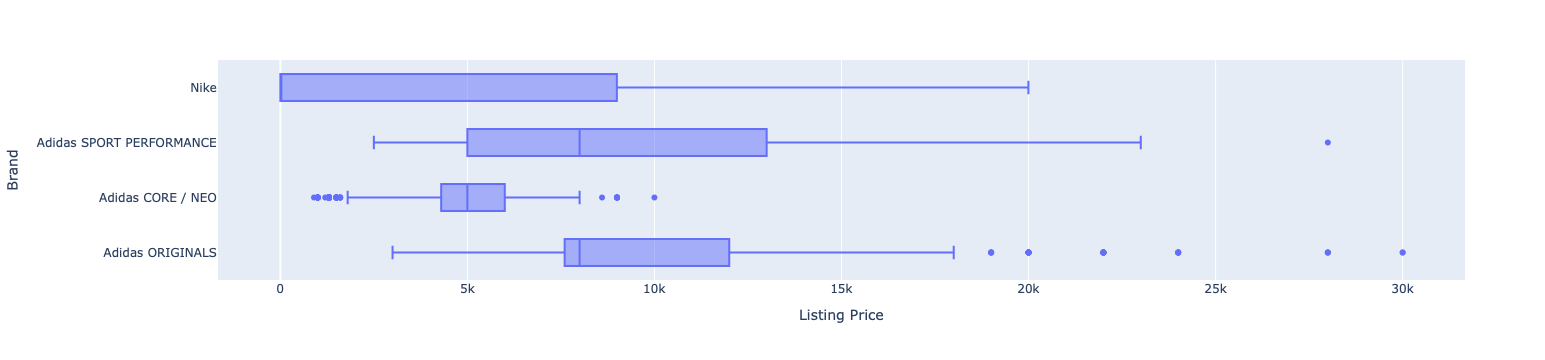

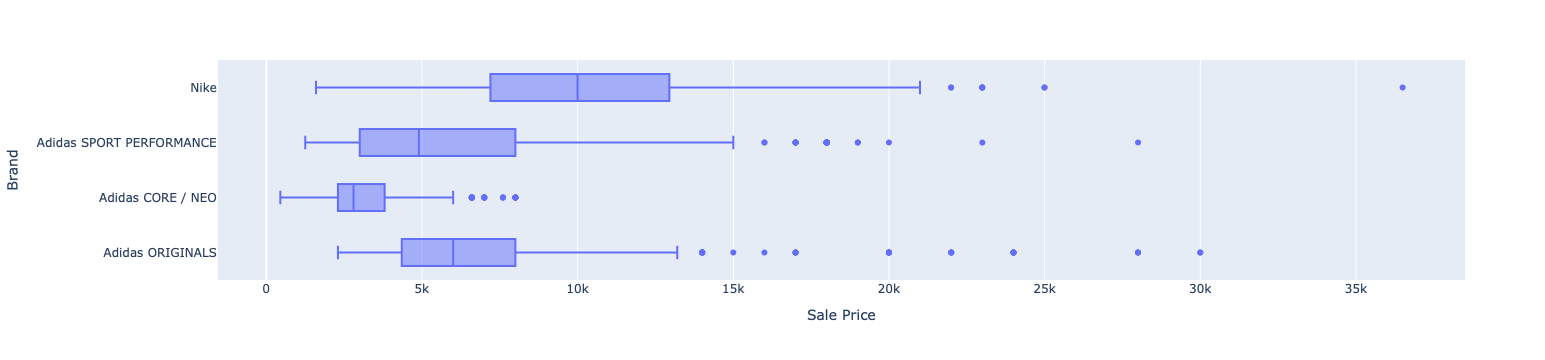

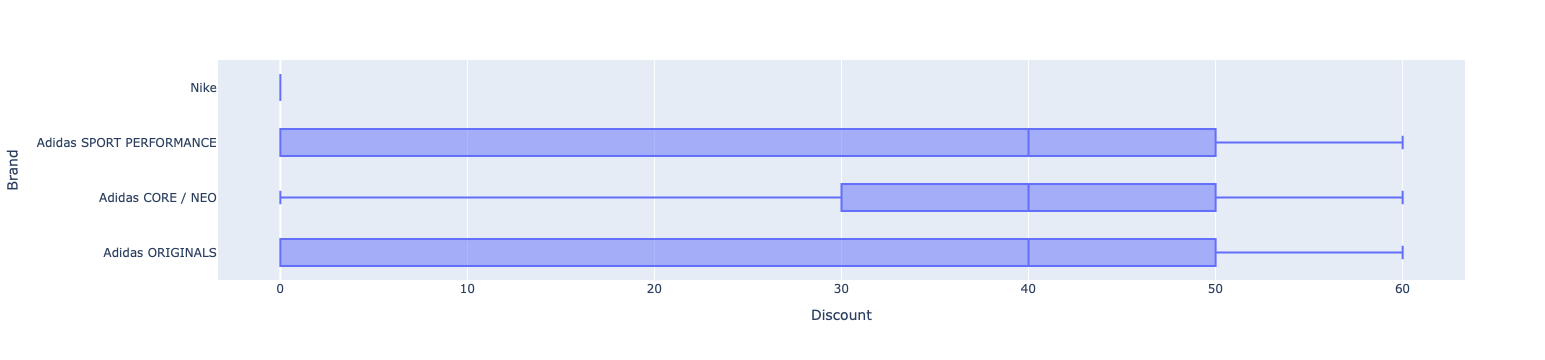

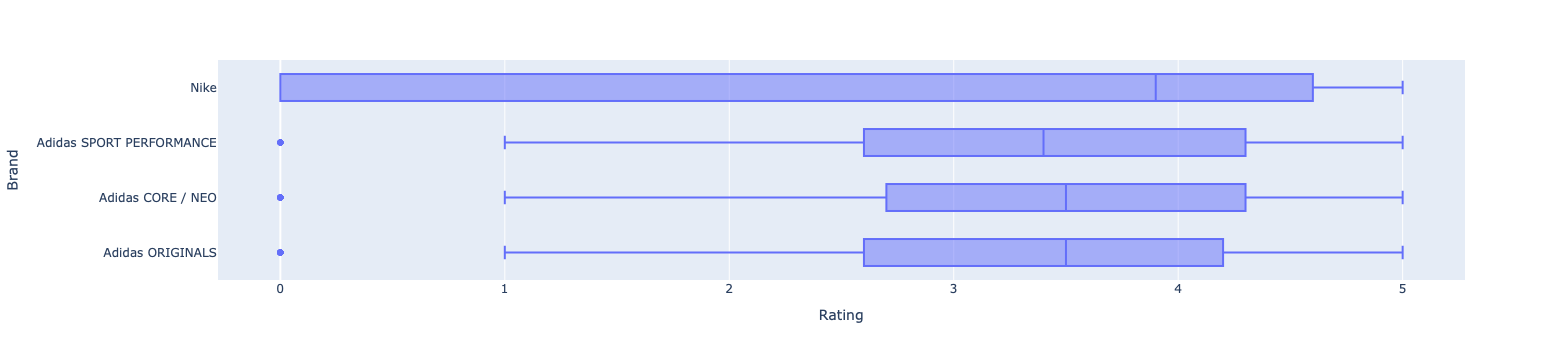

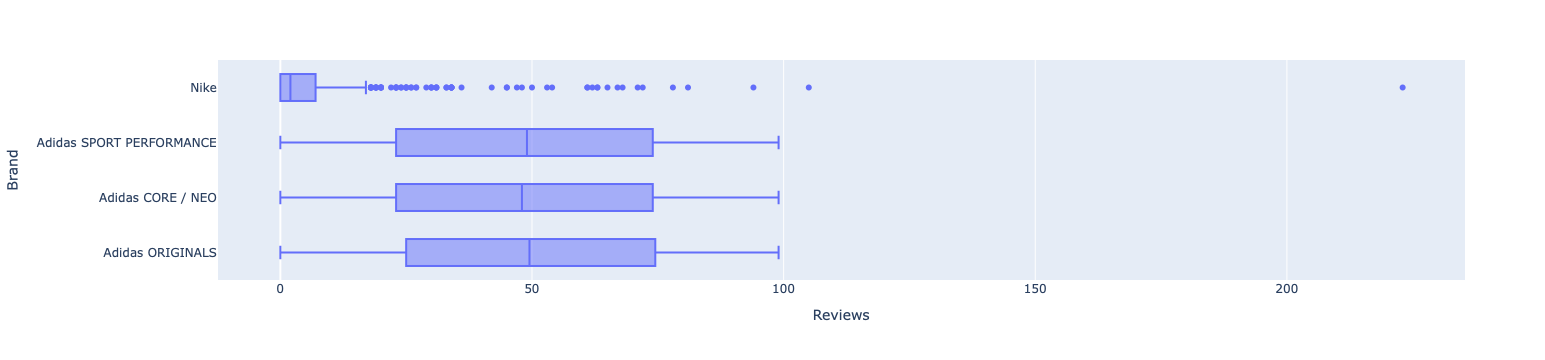

In [130]:
import plotly.express as px

for numeric_column in df.select_dtypes(include=["int64", "float64"]).columns:
    fig = px.box(df, x=numeric_column, y="Brand", hover_data=["Product Name"])
    fig.update_traces(quartilemethod="linear")
    fig.show()

In [131]:
def extract_gender(x):
    if x.lower().startswith("men's"):
        return "Men's"
    elif x.lower().startswith("women's"):
        return "Women's"
    else:
        return "Unisex"
df['Gender'] = df['Product Name'].apply(extract_gender)

df['Type'] = df['Product Name'].apply(lambda x: x.lower().split()[-1])

# Select columns
selected_cols = ['Discount', 'Sale Price', 'Brand', 'Rating', 'Reviews', 'Gender', 'Type']
df = df[selected_cols]
print(df.shape)  # Prints the dimensions (rows and columns) of the filtered DataFrame
df.sample(5).T  # Displays a random sample of 5 rows transposed for better visibility

(3180, 7)


2222    2750     2971    2981  \
Discount                           0       0        0       0   
Sale Price                     12999   15995     6995    8495   
Brand       Adidas SPORT PERFORMANCE    Nike     Nike    Nike   
Rating                           4.2     4.7      4.0     0.0   
Reviews                           48     223        6       0   
Gender                         Men's  Unisex   Unisex  Unisex   
Type                           shoes   retro  premium      tf   

                         1511  
Discount                   50  
Sale Price               2999  
Brand       Adidas CORE / NEO  
Rating                    1.5  
Reviews                     1  
Gender                  Men's  
Type                    shoes

In [132]:
df

Discount  Sale Price              Brand  Rating  Reviews   Gender  \
0           50        7499   Adidas ORIGINALS     4.8       41  Women's   
1           50        3799   Adidas ORIGINALS     3.3       24  Women's   
2           40         599  Adidas CORE / NEO     2.6       37  Women's   
3           50        3499  Adidas CORE / NEO     4.1       35  Women's   
4           50        3999   Adidas ORIGINALS     3.5       72  Women's   
...        ...         ...                ...     ...      ...      ...   
3260         0        6495               Nike     0.0        0   Unisex   
3262         0       13995               Nike     3.0        1   Unisex   
3263         0       12797               Nike     5.0        1   Unisex   
3266         0       16995               Nike     4.0        4   Unisex   
3267         0        6297               Nike     0.0        0   Unisex   

          Type  
0        shoes  
1        shoes  
2     slippers  
3        shoes  
4        shoes  
...        ...  
3260        tf  
3262       amp  
3263     retro  
3266        98  
3267        se  

[3180 rows x 7 columns]

In [133]:
unique_counts_per_column = df.nunique(axis=0)
unique_counts_per_column

Discount        6
Sale Price    227
Brand           4
Rating         32
Reviews       102
Gender          3
Type          200
dtype: int64

In [134]:
zero_df = df[df['Reviews'] == 0]
zero_df.head(100)

Discount  Sale Price                     Brand  Rating  Reviews  \
179         50        2499         Adidas CORE / NEO     4.8        0   
307         50        2499         Adidas CORE / NEO     1.5        0   
478         50        2499  Adidas SPORT PERFORMANCE     4.5        0   
530          0        7999          Adidas ORIGINALS     3.8        0   
565         40        3359         Adidas CORE / NEO     3.7        0   
637         40        1679  Adidas SPORT PERFORMANCE     4.9        0   
652          0        3799         Adidas CORE / NEO     4.0        0   
933         40        4559          Adidas ORIGINALS     4.1        0   
954         50        3499         Adidas CORE / NEO     2.7        0   
994         50        4499          Adidas ORIGINALS     3.5        0   
1121        40        4799          Adidas ORIGINALS     3.6        0   
1202        60         600         Adidas CORE / NEO     2.9        0   
1283        40        4799  Adidas SPORT PERFORMANCE     4.4        0   
1309         0        5599         Adidas CORE / NEO     2.5        0   
1576        50        3499  Adidas SPORT PERFORMANCE     2.7        0   
1658         0        7999          Adidas ORIGINALS     4.5        0   
1898        50        3999          Adidas ORIGINALS     2.0        0   
1906         0       13999          Adidas ORIGINALS     3.8        0   
1944        60        1840         Adidas CORE / NEO     1.0        0   
1966        40        8999  Adidas SPORT PERFORMANCE     4.2        0   
2022         0        5999  Adidas SPORT PERFORMANCE     0.0        0   
2083        50        2999         Adidas CORE / NEO     3.0        0   
2102        40        4559          Adidas ORIGINALS     2.8        0   
2173        40        4799          Adidas ORIGINALS     3.8        0   
2202        50        2999  Adidas SPORT PERFORMANCE     2.7        0   
2230         0        5999         Adidas CORE / NEO     4.7        0   
2381        40        8999  Adidas SPORT PERFORMANCE     2.7        0   
2485         0        5999  Adidas SPORT PERFORMANCE     2.0        0   
2625         0        7495                      Nike     0.0        0   
2626         0        7495                      Nike     0.0        0   
2627         0        9995                      Nike     0.0        0   
2628         0        9995                      Nike     0.0        0   
2629         0        9995                      Nike     0.0        0   
2630         0        9995                      Nike     0.0        0   
2631         0        5995                      Nike     0.0        0   
2637         0       10495                      Nike     0.0        0   
2638         0        7995                      Nike     0.0        0   
2641         0       14995                      Nike     0.0        0   
2643         0        7995                      Nike     0.0        0   
2644         0        5495                      Nike     0.0        0   
2645         0       15995                      Nike     0.0        0   
2649         0       11995                      Nike     0.0        0   
2651         0        9995                      Nike     0.0        0   
2654         0       11995                      Nike     0.0        0   
2658         0       11997                      Nike     0.0        0   
2659         0       13995                      Nike     0.0        0   
2660         0        8995                      Nike     0.0        0   
2662         0       15995                      Nike     0.0        0   
2667         0        5495                      Nike     0.0        0   
2669         0       12995                      Nike     0.0        0   
2670         0       16995                      Nike     0.0        0   
2671         0       11995                      Nike     0.0        0   
2672         0       10995                      Nike     0.0        0   
2673         0        5495                      Nike     0.0    

In [135]:
zeroprice_df = df[df['Sale Price'] == 0]
zeroprice_df

Empty DataFrame
Columns: [Discount, Sale Price, Brand, Rating, Reviews, Gender, Type]
Index: []

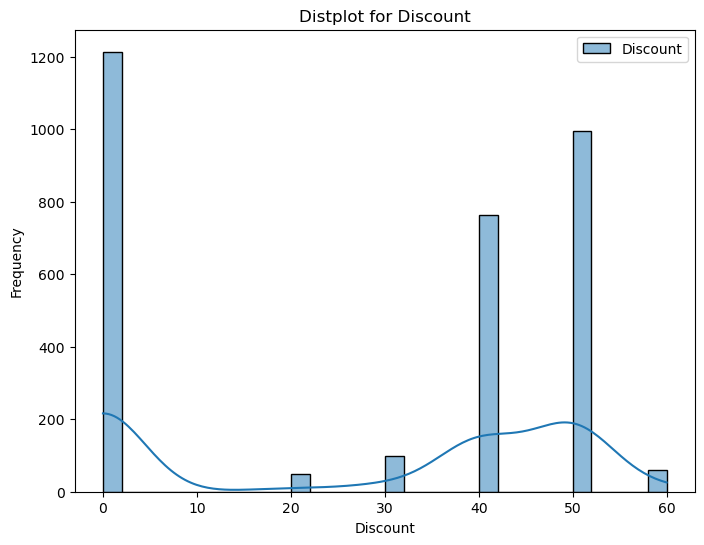

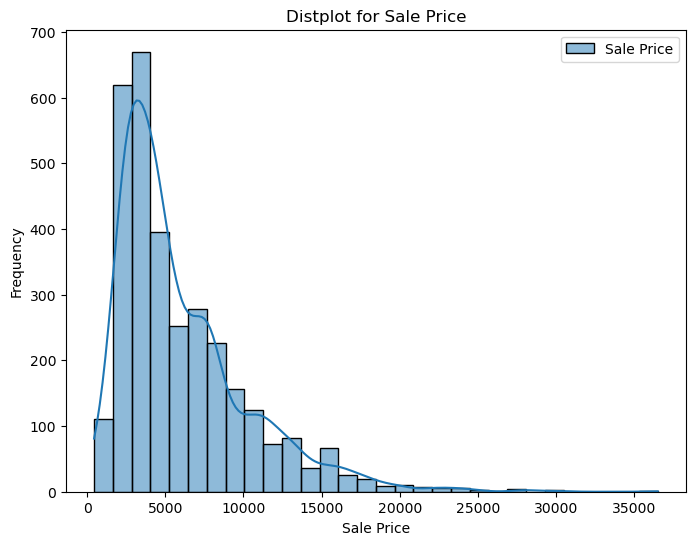

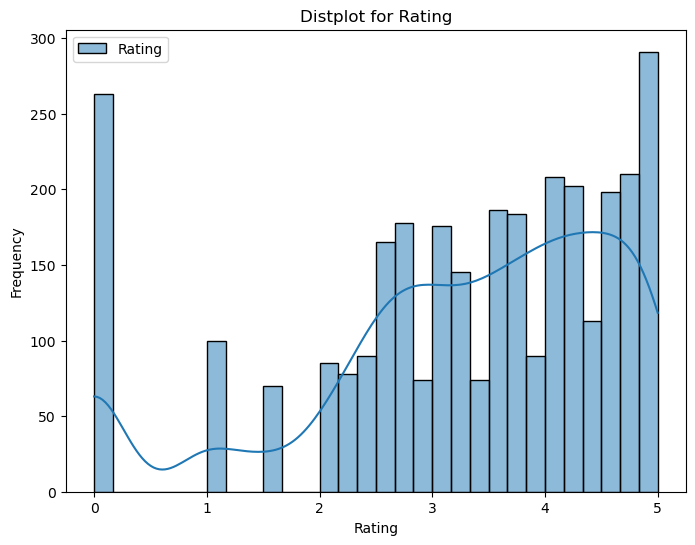

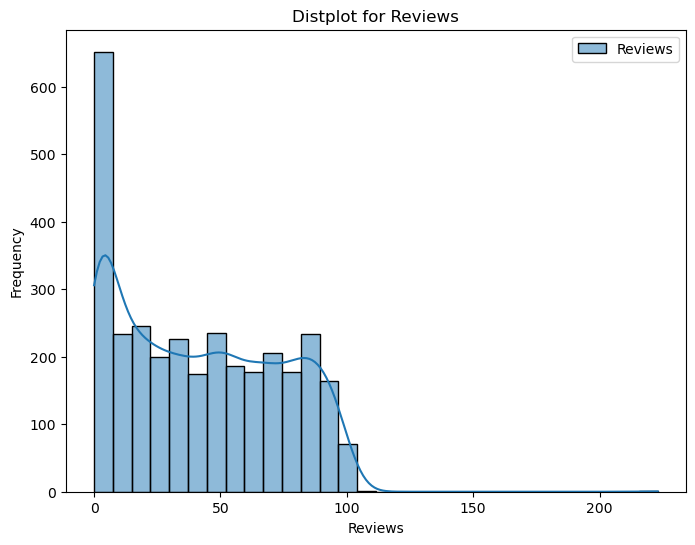

In [136]:
import matplotlib.pyplot as plt


for numeric_column in df.select_dtypes(include=["int64", "float64"]).columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[numeric_column], kde=True, bins=30, label=numeric_column)
    plt.title(f"Distplot for {numeric_column}")
    plt.xlabel(numeric_column)
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

In [137]:
from feature_engine.encoding import RareLabelEncoder

# RareLabelEncode the 'Type' column
encoder = RareLabelEncoder(n_categories=1, max_n_categories=150, replace_with='Other', tol=70 / df.shape[0])
df['Type'] = encoder.fit_transform(df[['Type']])  # Apply RareLabelEncoder only on 'Type'

# Print the shape of the resulting DataFrame
print(df.shape)

# Display a sample of 10 rows from the DataFrame
df.sample(10).T


(3180, 7)


1565              787               897   \
Discount                  50                50                50   
Sale Price              3499              6499              8499   
Brand       Adidas ORIGINALS  Adidas ORIGINALS  Adidas ORIGINALS   
Rating                   3.5               4.1               2.9   
Reviews                   67                95                73   
Gender                Unisex             Men's           Women's   
Type                   shoes             shoes             shoes   

                         328                       1308    3096  \
Discount                   50                        40       0   
Sale Price               2649                      5399   12995   
Brand       Adidas CORE / NEO  Adidas SPORT PERFORMANCE    Nike   
Rating                    1.0                       3.5     4.0   
Reviews                    51                        22       1   
Gender                  Men's                   Women's  Unisex   
Type                    shoes                     shoes   Other   

                        154               1975    2731  \
Discount                  60                40       0   
Sale Price              4800              5399    8495   
Brand       Adidas ORIGINALS  Adidas ORIGINALS    Nike   
Rating                   3.5               3.0     0.0   
Reviews                   51                24       0   
Gender               Women's             Men's  Unisex   
Type                   shoes             shoes   Other   

                                1637  
Discount                          50  
Sale Price                      1249  
Brand       Adidas SPORT PERFORMANCE  
Rating                           1.0  
Reviews                           31  
Gender                       Women's  
Type                         sandals

In [138]:
df

Discount  Sale Price              Brand  Rating  Reviews   Gender  \
0           50        7499   Adidas ORIGINALS     4.8       41  Women's   
1           50        3799   Adidas ORIGINALS     3.3       24  Women's   
2           40         599  Adidas CORE / NEO     2.6       37  Women's   
3           50        3499  Adidas CORE / NEO     4.1       35  Women's   
4           50        3999   Adidas ORIGINALS     3.5       72  Women's   
...        ...         ...                ...     ...      ...      ...   
3260         0        6495               Nike     0.0        0   Unisex   
3262         0       13995               Nike     3.0        1   Unisex   
3263         0       12797               Nike     5.0        1   Unisex   
3266         0       16995               Nike     4.0        4   Unisex   
3267         0        6297               Nike     0.0        0   Unisex   

          Type  
0        shoes  
1        shoes  
2     slippers  
3        shoes  
4        shoes  
...        ...  
3260     Other  
3262     Other  
3263     Other  
3266     Other  
3267     Other  

[3180 rows x 7 columns]

In [139]:
df.dtypes

Discount        int64
Sale Price      int64
Brand          object
Rating        float64
Reviews         int64
Gender         object
Type           object
dtype: object

## Outlier handling

In [140]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]
    return df

for col in [ 'Sale Price', 'Discount', 'Rating', 'Reviews']:
    df = remove_outliers_iqr(df, col)

In [141]:
df

Discount  Sale Price              Brand  Rating  Reviews   Gender  \
0           50        7499   Adidas ORIGINALS     4.8       41  Women's   
1           50        3799   Adidas ORIGINALS     3.3       24  Women's   
2           40         599  Adidas CORE / NEO     2.6       37  Women's   
3           50        3499  Adidas CORE / NEO     4.1       35  Women's   
4           50        3999   Adidas ORIGINALS     3.5       72  Women's   
...        ...         ...                ...     ...      ...      ...   
3255         0       12797               Nike     5.0        1   Unisex   
3260         0        6495               Nike     0.0        0   Unisex   
3262         0       13995               Nike     3.0        1   Unisex   
3263         0       12797               Nike     5.0        1   Unisex   
3267         0        6297               Nike     0.0        0   Unisex   

          Type  
0        shoes  
1        shoes  
2     slippers  
3        shoes  
4        shoes  
...        ...  
3255     Other  
3260     Other  
3262     Other  
3263     Other  
3267     Other  

[3055 rows x 7 columns]

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3055 entries, 0 to 3267
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Discount    3055 non-null   int64  
 1   Sale Price  3055 non-null   int64  
 2   Brand       3055 non-null   object 
 3   Rating      3055 non-null   float64
 4   Reviews     3055 non-null   int64  
 5   Gender      3055 non-null   object 
 6   Type        3055 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 190.9+ KB


In [143]:
from sklearn.preprocessing import OneHotEncoder

# Ensure the columns are strings for encoding
for col in ['Brand', 'Gender', 'Type']:
    df[col] = df[col].astype(str)

# Perform OneHotEncoding on 'Brand', 'Gender', and 'Type' without dropping any category
encoder = OneHotEncoder(drop=None, sparse_output=False)  # Do not drop any category
encoded_columns = encoder.fit_transform(df[['Brand', 'Gender', 'Type']])

# Get feature names for the encoded columns
encoded_feature_names = encoder.get_feature_names_out(['Brand', 'Gender', 'Type'])

# Create a DataFrame for the encoded columns
encoded_df = pd.DataFrame(encoded_columns, columns=encoded_feature_names, index=df.index)

# Concatenate the encoded columns back into the original DataFrame
df = pd.concat([df, encoded_df], axis=1)

# Optional: Drop the original columns if they're no longer needed
df = df.drop(columns=['Brand', 'Gender', 'Type'])

# Print the resulting DataFrame shape
print(df.shape)

# Display a sample of 10 rows
df.sample(10).T


(3055, 15)


381     173     2522    679     2944  \
Discount                          50.0    50.0    40.0    40.0     0.0   
Sale Price                      2399.0  3999.0  2879.0  4559.0  4995.0   
Rating                             4.5     4.6     0.0     4.1     0.0   
Reviews                           76.0    46.0    64.0    10.0     0.0   
Brand_Adidas CORE / NEO            1.0     0.0     0.0     0.0     0.0   
Brand_Adidas ORIGINALS             0.0     1.0     0.0     1.0     0.0   
Brand_Adidas SPORT PERFORMANCE     0.0     0.0     1.0     0.0     0.0   
Brand_Nike                         0.0     0.0     0.0     0.0     1.0   
Gender_Men's                       0.0     0.0     1.0     1.0     0.0   
Gender_Unisex                      0.0     0.0     0.0     0.0     1.0   
Gender_Women's                     1.0     1.0     0.0     0.0     0.0   
Type_Other                         0.0     0.0     0.0     0.0     1.0   
Type_sandals                       0.0     0.0     0.0     0.0     0.0   
Type_shoes                         1.0     1.0     1.0     1.0     0.0   
Type_slippers                      0.0     0.0     0.0     0.0     0.0   

                                  586     858     556     1246    2696  
Discount                          50.0    50.0    40.0     0.0     0.0  
Sale Price                      2799.0  3999.0  3959.0  3599.0  5995.0  
Rating                             3.8     3.3     1.0     3.8     0.0  
Reviews                           62.0     1.0    78.0    25.0     0.0  
Brand_Adidas CORE / NEO            1.0     0.0     1.0     0.0     0.0  
Brand_Adidas ORIGINALS             0.0     1.0     0.0     1.0     0.0  
Brand_Adidas SPORT PERFORMANCE     0.0     0.0     0.0     0.0     0.0  
Brand_Nike                         0.0     0.0     0.0     0.0     1.0  
Gender_Men's                       1.0     0.0     1.0     0.0     0.0  
Gender_Unisex                      0.0     0.0     0.0     0.0     1.0  
Gender_Women's                     0.0     1.0     0.0     1.0     0.0  
Type_Other                         0.0     0.0     0.0     1.0     1.0  
Type_sandals                       0.0     0.0     0.0     0.0     0.0  
Type_shoes                         1.0     1.0     1.0     0.0     0.0  
Type_slippers                      0.0     0.0     0.0     0.0     0.0

Best K: 11


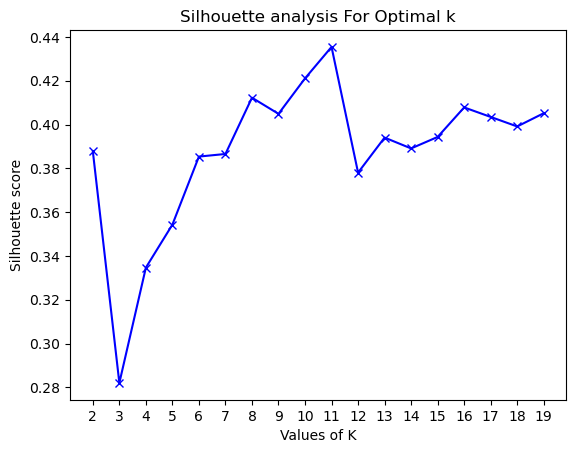

In [144]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import DBSCAN
import numpy as np

X = df

# Scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

# Convert to pandas DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=X.columns)

silhouette_avg = []
for num_clusters in list(range(2,20)):
    kmeans = KMeans(n_clusters=num_clusters, init = "k-means++", n_init = 10)
    kmeans.fit_predict(scaled_df)
    score = silhouette_score(scaled_df, kmeans.labels_)
    silhouette_avg.append(score)

import matplotlib.pyplot as plt
plt.plot(np.arange(2,20),silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
_ = plt.xticks(np.arange(2,20))

print (f"Best K: {np.argmax(silhouette_avg)+2}")

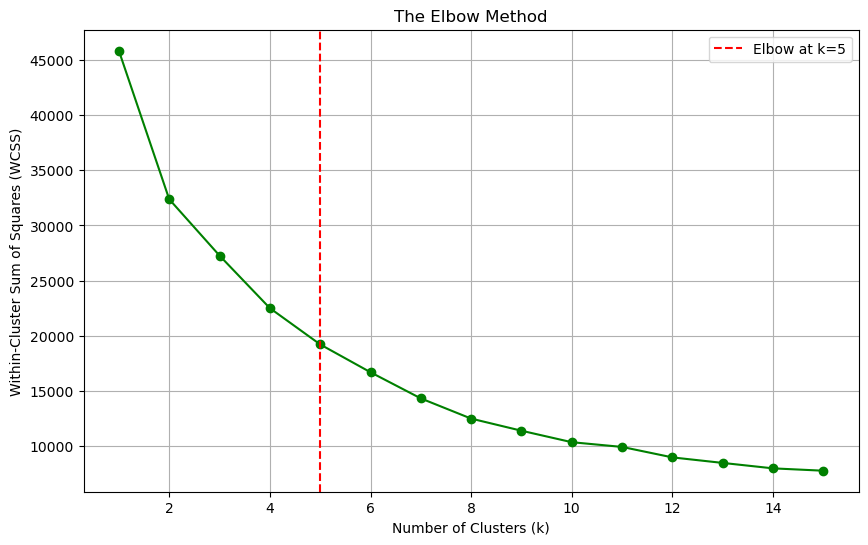

The optimal number of clusters is: 5


In [145]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator

def find_optimal_k(data, max_k=15):
    """
    Find optimal k using elbow method with automated elbow detection.
    
    Parameters:
    data: DataFrame or array-like
        The input data to be clustered
    max_k: int
        Maximum number of clusters to try
        
    Returns:
    optimal_k: int
        Optimal number of clusters
    wcss: list
        List of within-cluster sum of squares for each k
    """
    # Standardize the features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(data)
    
    # Calculate WCSS for different values of k
    wcss = []
    k_values = range(1, max_k + 1)
    
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(scaled_features)
        wcss.append(kmeans.inertia_)
    
    # Use KneeLocator to find the elbow point
    kl = KneeLocator(
        x=list(k_values),
        y=wcss,
        curve='convex',
        direction='decreasing'
    )
    
    # Plot the elbow curve
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, wcss, 'go-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
    plt.title('The Elbow Method')
    plt.axvline(x=kl.elbow, color='r', linestyle='--', label=f'Elbow at k={kl.elbow}')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return kl.elbow, wcss

# Example usage
if __name__ == "__main__":
  
    
    optimal_k, wcss_values = find_optimal_k(df)
    print(f"The optimal number of clusters is: {optimal_k}")

Silhouette Score: 0.41547827822623074


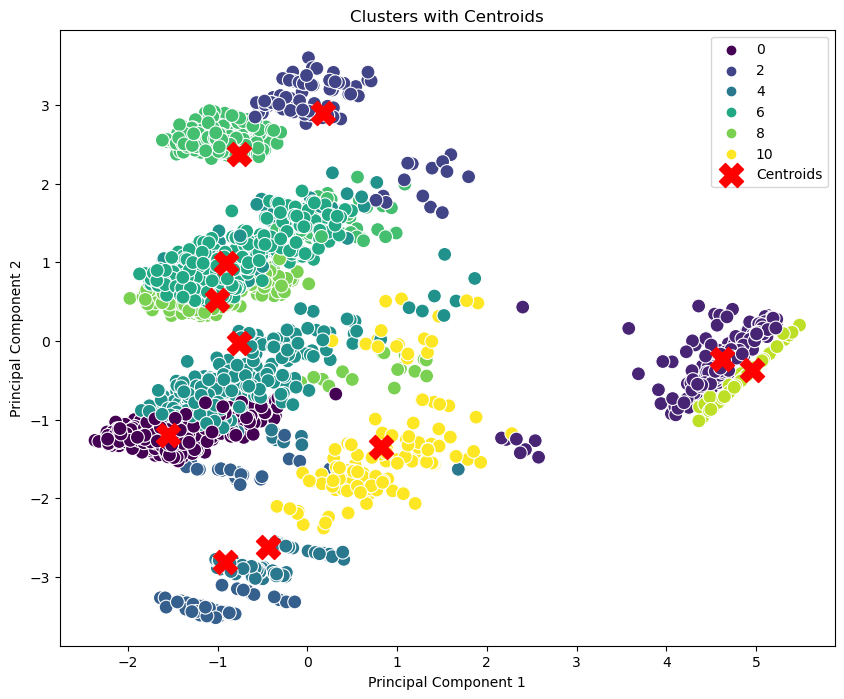

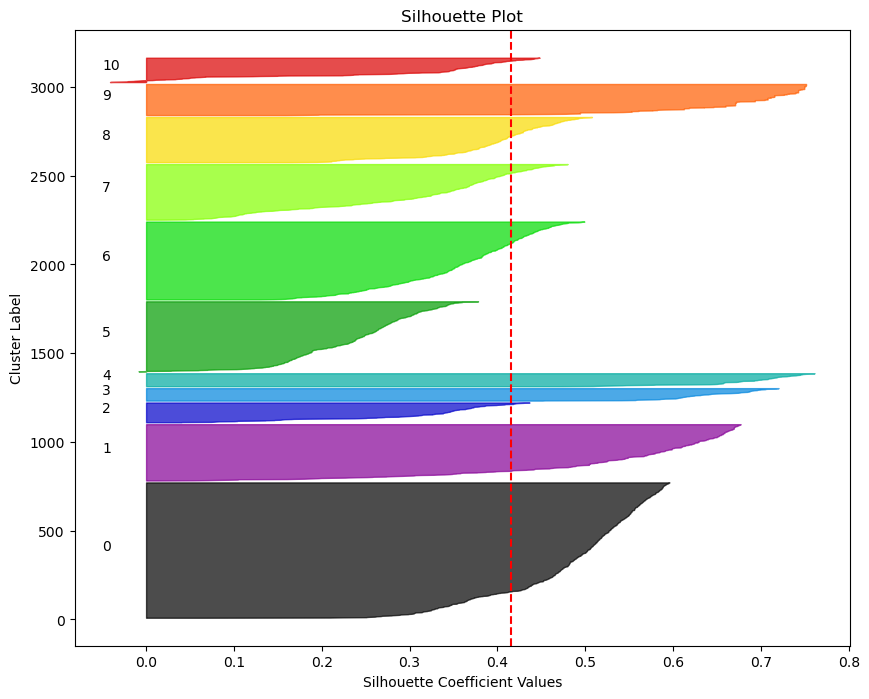

In [146]:
# Define the number of clusters from the elbow method
n_clusters = 11  # Adjust based on your observation from the elbow plot

# Apply KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans.fit(scaled_features)

# Add clusters to the data
df['Cluster'] = kmeans.labels_

# Compute silhouette score
silhouette_avg = silhouette_score(scaled_features, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg}')

# PCA for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# Add principal components to DataFrame
df['PC1'] = principal_components[:, 0]
df['PC2'] = principal_components[:, 1]

# Plot the clusters and centroids
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df, palette='viridis', s=100)
centroids = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('Clusters with Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Silhouette plot
fig, ax = plt.subplots(figsize=(10, 8))
silhouette_values = silhouette_samples(scaled_features, kmeans.labels_)

y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = silhouette_values[kmeans.labels_ == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / n_clusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                     0, ith_cluster_silhouette_values,
                     facecolor=color, edgecolor=color, alpha=0.7)

    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax.set_title("Silhouette Plot")
ax.set_xlabel("Silhouette Coefficient Values")
ax.set_ylabel("Cluster Label")

# The vertical line for average silhouette score of all the values
plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.show()

In [152]:
# Inspect clusters' average for each feature
cluster_profiles = df.groupby('Cluster').agg({
    'Listing Price': 'mean',
    'Sale Price': 'mean',
    'Discount': 'mean',
    'Rating': 'mean',
    'Reviews': 'mean'
})

# Visualize price-related features
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Cluster', y='Listing Price', data=df, palette='viridis')
plt.title('Listing Price Distribution by Cluster')
plt.subplot(1, 2, 2)
sns.boxplot(x='Cluster', y='Sale Price', data=df, palette='viridis')
plt.title('Sale Price Distribution by Cluster')
plt.show()

# Visualize Discounts and Ratings
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Cluster', y='Discount', data=df, palette='viridis')
plt.title('Discount Distribution by Cluster')
plt.subplot(1, 2, 2)
sns.boxplot(x='Cluster', y='Rating', data=df, palette='viridis')
plt.title('Rating Distribution by Cluster')
plt.show()

# Visualize Reviews
plt.figure(figsize=(7, 6))
sns.boxplot(x='Cluster', y='Reviews', data=df, palette='viridis')
plt.title('Reviews Distribution by Cluster')
plt.show()

KeyError: "Column(s) ['Listing Price'] do not exist"

In [153]:
# Group by cluster and calculate descriptive statistics
descriptive_stats = df.groupby('Cluster').agg({
    'Listing Price': ['mean', 'median', 'std', 'count'],
    'Sale Price': ['mean', 'median', 'std', 'count'],
    'Discount': ['mean', 'median', 'std', 'count'],
    'Rating': ['mean', 'median', 'std', 'count'],
    'Reviews': ['mean', 'median', 'std', 'count']
})

descriptive_stats.T.round(2)


KeyError: "Column(s) ['Listing Price'] do not exist"

In [154]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define features to consider for correlation analysis
features_for_correlation = ['Listing Price', 'Sale Price', 'Discount', 'Rating', 'Reviews']

# Create a correlation heatmap for each KMeans cluster
for cluster in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster][features_for_correlation]
    correlation_matrix = cluster_data.corr()

    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Correlation Heatmap for KMeans Cluster {cluster}')
    plt.show()

KeyError: "['Listing Price'] not in index"

In [155]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate and display a word cloud
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Iterate over each cluster
for cluster in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster]

    # Concatenate Product Names and Brands for the word cloud
    product_text = ' '.join(cluster_data['Product Name'])
    brand_text = ' '.join(cluster_data['Brand'])
    full_text = product_text + ' ' + brand_text

    # Generate WordCloud for the combined text
    generate_word_cloud(full_text, f'Word Cloud for Cluster {cluster}')

KeyError: 'Product Name'